In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("March18_Morning_data.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Chan_0_1      202 non-null    int64  
 1   Chan_0_2      202 non-null    int64  
 2   Chan_1_2      202 non-null    int64  
 3   timestamp     202 non-null    object 
 4   Latitude      170 non-null    float64
 5   Longitude     170 non-null    float64
 6   Altitude (m)  170 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 11.2+ KB
<class 'numpy.ndarray'>
     Chan_0_1  Chan_0_2  Chan_1_2                  timestamp   Latitude  \
0          15        11        30  Sat Mar  18 11:08:47 2023  33.751984   
1          16        12        21  Sat Mar  18 11:09:47 2023  33.751982   
2          19        12        27  Sat Mar  18 11:10:47 2023  33.751242   
3          16        17        26  Sat Mar  18 11:11:47 2023  33.750882   
4          25        19        28  Sat Mar  18 

In [60]:
df_morn.dropna(inplace=True)

In [61]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Chan_0_1      170 non-null    int64  
 1   Chan_0_2      170 non-null    int64  
 2   Chan_1_2      170 non-null    int64  
 3   timestamp     170 non-null    object 
 4   Latitude      170 non-null    float64
 5   Longitude     170 non-null    float64
 6   Altitude (m)  170 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 10.6+ KB


In [62]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m)
0,15,11,30,2023-03-18 11:08:47,33.751984,-84.378320,305.101994
1,16,12,21,2023-03-18 11:09:47,33.751982,-84.378330,305.279351
2,19,12,27,2023-03-18 11:10:47,33.751242,-84.377937,305.846874
3,16,17,26,2023-03-18 11:11:47,33.750882,-84.376687,305.693314
4,25,19,28,2023-03-18 11:12:47,33.748431,-84.376664,314.319110


In [63]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m)
0,15,11,30,2023-03-18 11:08:47,33.751984,-84.378320,305.101994
1,16,12,21,2023-03-18 11:09:47,33.751982,-84.378330,305.279351
2,19,12,27,2023-03-18 11:10:47,33.751242,-84.377937,305.846874
3,16,17,26,2023-03-18 11:11:47,33.750882,-84.376687,305.693314
4,25,19,28,2023-03-18 11:12:47,33.748431,-84.376664,314.319110


In [64]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [65]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  170 non-null    datetime64[ns]
 1   Chan_0_1   170 non-null    int64         
 2   Chan_0_2   170 non-null    int64         
 3   Chan_1_2   170 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.6 KB


In [66]:
df_morn_counts = df_morn_counts.resample('T', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-18 11:08:00,15.0,11.0,30.0
2023-03-18 11:09:00,16.0,12.0,21.0
2023-03-18 11:10:00,19.0,12.0,27.0
2023-03-18 11:11:00,16.0,17.0,26.0
2023-03-18 11:12:00,25.0,19.0,28.0


In [67]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

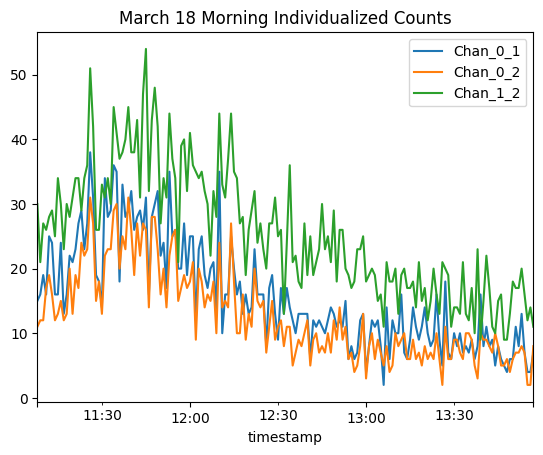

In [68]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [69]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-18 11:08:00,15.0,11.0,30.0,18.666667
2023-03-18 11:09:00,16.0,12.0,21.0,16.333333
2023-03-18 11:10:00,19.0,12.0,27.0,19.333333
2023-03-18 11:11:00,16.0,17.0,26.0,19.666667
2023-03-18 11:12:00,25.0,19.0,28.0,24.000000


Text(0.5, 1.0, 'March 18 Morning Individual and Average Counts')

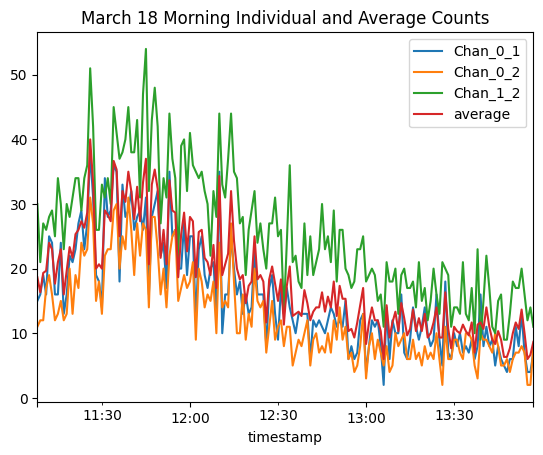

In [70]:
df_morn_counts.plot()
plt.title('March 18 Morning Individual and Average Counts')

Text(0.5, 1.0, 'March 18 Morning Average Counts')

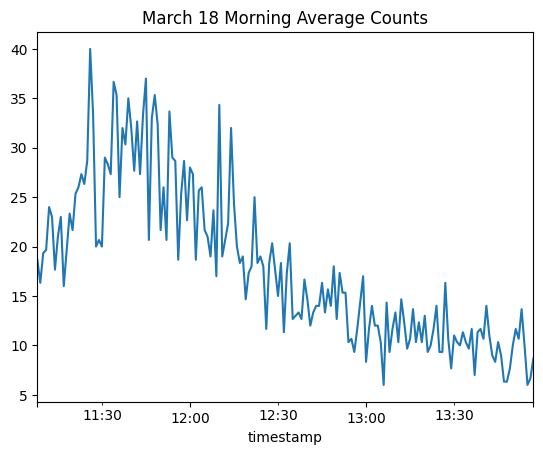

In [71]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')